# Задания

1. [x] Загрузите файл HR.csv в pandas dataframe
2. [x] Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)
3. [x] Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные
4. [x] Рассчитайте сколько сотрудников работает в каждом департаменте
5. [x] Показать распределение сотрудников по зарплатам
6. [x] Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
7. [x] Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
8. [x] Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)
    * [x] Доля сотрудников с повышением за последние 5 лет
    * [x] Средняя степень удовлетворенности
    * [x] Среднее количество проектов
9. [x] Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary). <br>Оценить качество модели на тестовой выборки
10. [x] Загрузить jupyter notebook с решение на github и прислать ссылку

In [1]:
import pandas as pd

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']] =\
df[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   department             14999 non-null  category
 9   salary                 14999 non-null  category
dtypes: category(5), float64(2), int64(3)
memory usage: 660.1 KB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [5]:
df.describe(include='category')

,Work_accident,left,promotion_last_5years,department,salary
count,14999,14999,14999,14999,14999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,12830,11428,14680,4140,7316


top = mode

In [6]:
df[['number_project', 'time_spend_company']].astype('category').describe()

,number_project,time_spend_company
count,14999,14999
unique,6,8
top,4,3
freq,4365,6443


In [7]:
df_corr = df.corr()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

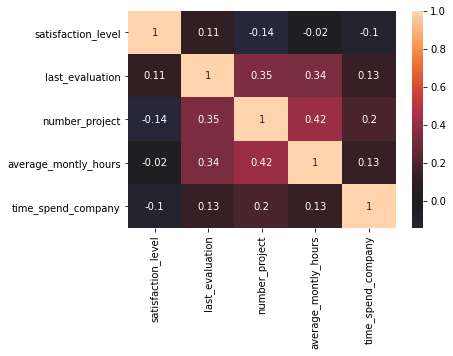

In [9]:
sns.heatmap(df_corr, annot=True, center=0)

Наиболее скореллированные:
- average_montly_hours
- number_project 

Наименее скореллированные:
- average_montly_hours
- satisfaction_level

In [10]:
# Количество сотрудников по департаментам
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [11]:
df['salary'] = pd.Categorical(df['salary'], ['low','medium','high'])

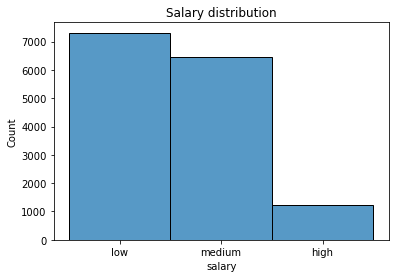

In [12]:
sns.histplot(data=df['salary'])
plt.title('Salary distribution');

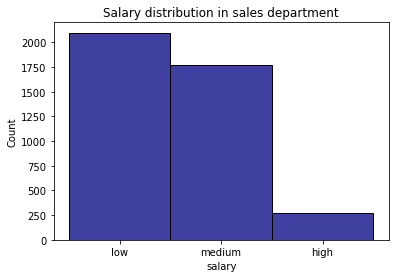

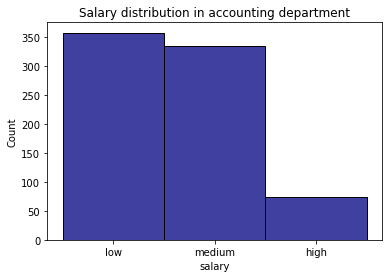

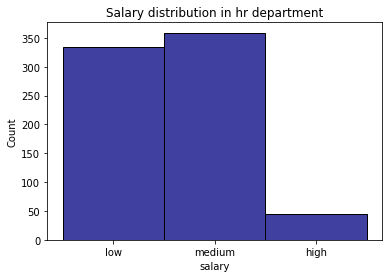

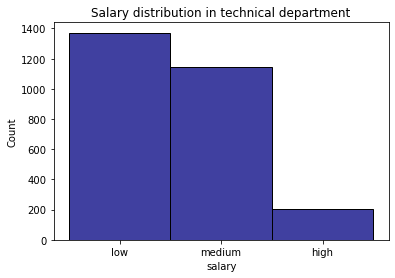

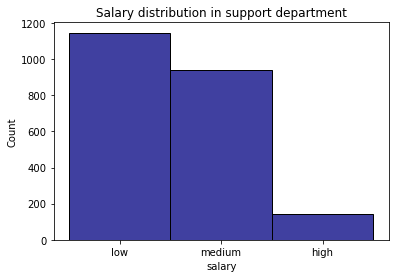

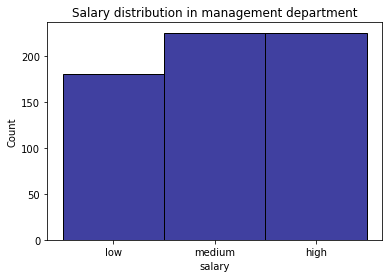

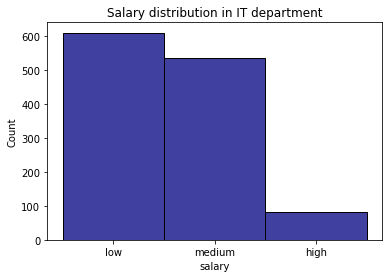

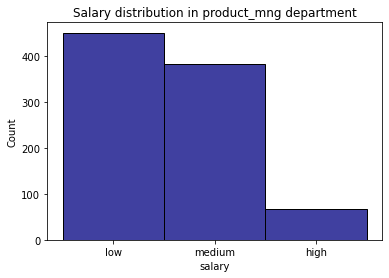

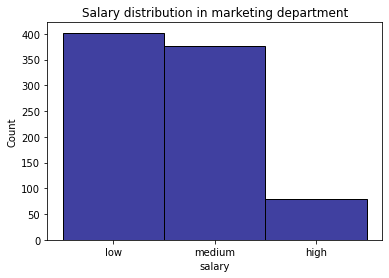

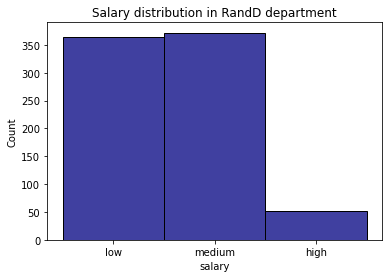

In [13]:
for department in df['department'].unique():
    sns.histplot(data=df[df['department'] == department]['salary'], color='navy')
    plt.title(f'Salary distribution in {department} department')
    plt.show()

In [14]:
from scipy import stats

* H0

    ***high_salary_staff average_montly_hours <= low_salary_staf average_montly_hours***
* H1

    ***high_salary_staff average_montly_hours > low_salary_staf average_montly_hours***


**Примем уровень значимости $\alpha=0.05$**

In [15]:
low_salary_staff_hour = df[df['salary']=='low']['average_montly_hours']
high_salary_staff_hour = df[df['salary']=='high']['average_montly_hours']

In [16]:
stats.ttest_ind(high_salary_staff_hour, low_salary_staff_hour, alternative='greater')

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.7669488260866371)

In [17]:
stats.mannwhitneyu(high_salary_staff_hour, low_salary_staff_hour, alternative='greater')

MannwhitneyuResult(statistic=4507096.5, pvalue=0.5879383099013082)

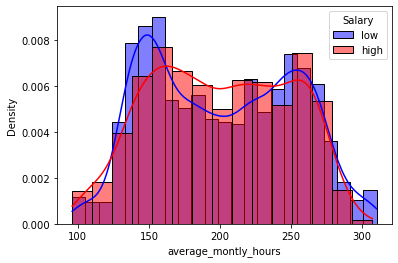

In [18]:
sns.histplot(low_salary_staff_hour, label='low', stat='density', color='b', kde=True)
sns.histplot(high_salary_staff_hour, label='high', stat='density', color='r', kde=True)
plt.legend(title='Salary')

p-value > $\alpha$ следовательно мы не можем отвергнуть нулевую гипотезу о том, что сотрудники с низкой зарплатой работают больше или так-же, как и с высокой

In [19]:
left_staff = df[df['left']==1]
staff = df[df['left']==0]

In [20]:
print(f"Доля уволившихся сотрудников, которых повысили за последние 5 лет равна \
{left_staff['promotion_last_5years'].astype(int).mean():.2%}")

print(f"Доля неуволившихся сотрудников, которых повысили за последние 5 лет равна \
{staff['promotion_last_5years'].astype(int).mean():.2%}")

Доля уволившихся сотрудников, которых повысили за последние 5 лет равна 0.53%
Доля неуволившихся сотрудников, которых повысили за последние 5 лет равна 2.63%


In [21]:
print(f"Уволившиеся сотрудники были в среднем были удоволетворены работой на {left_staff['satisfaction_level'].mean():.2%}")
print(f"Неуволившиеся сотрудники в среднем удоволетворены работой на {staff['satisfaction_level'].mean():.2%}")

Уволившиеся сотрудники были в среднем были удоволетворены работой на 44.01%
Неуволившиеся сотрудники в среднем удоволетворены работой на 66.68%


In [22]:
print(f"Уволившиеся сотрудники в среднем вели {left_staff['number_project'].mean():.2f} проекта(в)")
print(f"Неуволившиеся сотрудники в среднем ведут {staff['number_project'].mean():.2f} проекта(в)")

Уволившиеся сотрудники в среднем вели 3.86 проекта(в)
Неуволившиеся сотрудники в среднем ведут 3.79 проекта(в)


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
LDA = LinearDiscriminantAnalysis()

In [25]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']],
df['left'], test_size=0.3, random_state=14)

In [26]:
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [27]:
y_pred = LDA.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7606666666666667

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[0, 1]), columns=['pred_still', 'pred_left'], index=['still', 'left'])
cm

,pred_still,pred_left
still,3123,265
left,812,300


Данная модель ***плохо*** предсказывает уволившихся сотрудников(несмотря на то, что accuracy_score достаточно высок больший процент обеспечивают предсказания неуволившихся(оставшихся) сотрудников)

Используем RandomizedSearchCV

In [31]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [32]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier()

## With RandomizedSearchCV

---

In [34]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [35]:
%%time
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 16.4 s


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [36]:
rf_RandomGrid.best_params_

{'n_estimators': 48,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': False}

In [37]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.950
Test Accuracy - : 0.951


In [38]:
y_pred_rg = rf_RandomGrid.predict(X_test)

In [39]:
cm_rg = confusion_matrix(y_test, y_pred_rg)
cm_rg

array([[3366,   22],
       [ 198,  914]], dtype=int64)

Точность этой модели уже заметно выше в предсказании уволившихся сотрудников